# Lecture Worksheet 2: Data Wrangling I and ggplot2 I

## Instructions + Grading

+ To get full marks for each participation worksheet, you must successfully answer at least 40% of all autograded questions. In this worksheet, 40% is 11 questions.

+ Autograded questions are easily identifiable through their labelling as **QUESTION**. Any other instructions that prompt the student to write code are activities, which are not graded and thus do not contribute to marks - but do contribute to the workflow of the worksheet!

## Attributions

Thanks to Icíar Fernández Boyano and Victor Yuan for making this worksheet. The following resources were used as inspiration in the creation of this worksheet:

+ [Swirl R Programming Tutorial](https://swirlstats.com/scn/rprog.html)
+ [Palmer Penguins R Package](https://github.com/hadley/palmerpenguins)
+ [RD4S Data Transformation](https://r4ds.had.co.nz/transform.html)

# Part A: Getting started with your data

**Part A of this worksheet reviews the concepts learned in Class 4: Data Wrangling I.**

What's the first thing that you should do when you're starting a project with a new dataset? Having a coffee is a reasonable answer, but before that, you should **look at the data**. This may sound obvious, but a common mistake is to dive into the analysis too early before being familiar with the data - only to have to go back to the start when something goes wrong and you can't quite figure out why. Some of the questions you may want to ask are:

+ What is the format of the data?
+ What are the dimensions?
+ Are there missing data?

In part A of this worksheet, you will learn how to answer these questions and more using dplyr.

Load the `palmerpenguins`, `tidyverse`, `testthat`, and `digest` packages.
    - This loads `dplyr`, too.

In [1]:
# load your packages here:
suppressPackageStartupMessages(library(palmerpenguins))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(testthat))
suppressPackageStartupMessages(library(digest))

[Palmer penguins](https://github.com/hadley/palmerpenguins) is an R data package created by Allison Horst. Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. The dataset that we will be using is stored in a variable called "penguins". It is a subset of the "penguins_raw" dataset, also included in this R package. Let's have a look at it.

In [2]:
head(penguins)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


`head()` returns the first 6 rows of a dataframe, instead of printing all the data to screen.

## What is the format of the data?

Let's begin by checking the class of the **penguins** variable. This will give us a clue about the overall structure of the data.

In [3]:
class(penguins)

[1] "tbl_df"     "tbl"        "data.frame"

As you can see, the function returns 3 classes: "tbl_df", "tbl", and "data.frame". A dataframe is the default class for data read into R. Tibbles ("tbl" and "tbl_df") are a modern take on data frames, but slightly tweaked to work better in the tidyverse. For now, you don’t need to worry about the differences; we’ll come back to tibbles later. The dataset that we are working with was originally a data.frame that has been coerced into a tibble, which is why multiple class names are returned by the `class()` function.

## What are the dimensions?

There are two functions that we can use to see exactly how many rows (observations) and columns (variables) we're dealing with. `dim()` is the base R option, and `glimpse()` is the dplyr flavour, which gives us some more information besides the row and column number. Give both a try!

In [4]:
dim(penguins)
glimpse(penguins)

[1] 344   8

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Ade…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgers…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1,…
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1,…
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 18…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475,…
$ sex               <fct> male, female, female, NA, female, male, female, mal…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 200…


There are more functions that you can use to further explore the dimensions, such as `nrow()`, `ncol()`, `colnames()` or `rownames()`, but we won't be looking into those.

**QUESTION 1.0**

In the `dim()` function, what is the first number that you see?

1: rows   
2: columns

Put your selection into a variable named `answer1.0`.

In [5]:
# answer1.0 <- youranswer

### BEGIN SOLUTION
answer1.0 <- 1
### END SOLUTION

In [6]:
test_that("Question 1.0", {
    expect_equal(digest(as.numeric(answer1.0)), "6717f2823d3202449301145073ab8719")
})
cat("success!")

success!

## Exploring further: Five cornerstones of dplyr

So far, we've **looked** at our dataset. It's time to **work with** it! Prior to creating any models, or using visualization to gain more insights about our data, it is common to tweak the data in some ways to make it a little easier to work with. For example, you may need to rename some variables, reorder observations, or even create some new variables from your existing ones!

As explained in depth in the [R4DS Data Transformation chapter](https://r4ds.had.co.nz/transform.html), there are five key dplyr functions that allow you to solve the vast majority of data manipulation tasks:

+ Pick variables by their names (`select()`)
+ Pick observations by their values (`filter()`)
+ Reorder the rows (`arrange()`)
+ Create new variables with functions of existing variables (`mutate()`)
+ Collapse many values down to a single summary (`summarise()`)

### `select()` 

*A brief interlude on naming things:* Names are important. Jenny Bryan has some excellent [slides](https://speakerdeck.com/jennybc/how-to-name-files) for naming things in a way that is human readable *and* machine readable. Don't worry too much about it for this worksheet, but do keep it in mind as it helps with *reproducibility*. 

A quick tip that you can put into practice: you can use *Pascal case* - creating names by concatenating capitalized words, such as PenguinsSubset, or PenguinsTidy. If names get too long, remove vowels! For example, PngnSubset, or PngnTidy instead. Or, you can use snake_case!

**QUESTION 1.1**

In the next few questions, you will practice using the dplyr verb `select()` to pick and modify variables by their names. Make a data frame containing the columns `species`, `island`, `sex` from the penguins data, in that order.

Assign your answer to a variable named `answer1.1`

In [7]:
# answer1.1 <- select(penguins, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.1 <- select(penguins, species, island, sex)
### END SOLUTION

In [8]:
test_that("Question 1.1", {
    expect_equal(digest(as_tibble(answer1.1)), "0df5cac5070ec518519a6f2781f4e01f")
})
cat("success!")

success!

**QUESTION 1.1a**

Out of the following options, what would be the best name for the object that you just created above (currently stored in `answer1.1`)? Put your answer in a variable named `answer1.1a`.

1: _penguin_subset   
2: penguins   
3: 2penguin   
4: PngnSub   

In [9]:
# answer1.1a <- youranswer

### BEGIN SOLUTION
answer1.1a <- 4
### END SOLUTION

In [10]:
test_that("Question 1.1a", {
    expect_equal(digest(as.numeric(answer1.1a)), "dbc09cba9fe2583fb01d63c70e1555a8")
})
cat("success!")

success!

**QUESTION 1.2**

Select all variables, from `bill_length_mm` to `body_mass_g`. Of course, you could do it this way...

In [11]:
# This will work:
select(penguins, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) %>% 
   print(n = 5)

# A tibble: 344 x 4
  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
           <dbl>         <dbl>             <int>       <int>
1           39.1          18.7               181        3750
2           39.5          17.4               186        3800
3           40.3          18                 195        3250
4           NA            NA                  NA          NA
5           36.7          19.3               193        3450
# … with 339 more rows


But there is a better way to do it! Which do you think would work?

1: `select(penguins, body_mass_g:bill_length_mm)`   
2: `select(penguins, c(body_mass_g::bill_length_mm))`   
3: `select(penguins, bill_length_mm:body_mass_g)`   
4: `select(penguins, bill_length_mm::body_mass_g)`

Assign your answer to a variable called `answer1.2`


In [12]:
# answer1.2 <- youranswer

### BEGIN SOLUTION
answer1.2 <- 3
### END SOLUTION
print(answer1.2)

[1] 3


In [13]:
test_that("Question 1.2", {
    expect_equal(digest(as.numeric(answer1.2)), "e5b57f323c7b3719bbaaf9f96b260d39")
})
cat("success!")

success!

**QUESTION 1.3**

You're doing a great job. Keep it up! Now, select all variables, except `island`. How would you write this code?

1: `select(penguins, -c("island"))`   
2: `select(penguins, -island)`   
3: `select(penguins, -("island"))`   

Put your answer in a variable named `answer1.3`

In [14]:
# answer1.3 <- youranswer

### BEGIN SOLUTION
answer1.3 <- 2
### END SOLUTION

In [15]:
test_that("Question 1.3", {
    expect_equal(digest(as.numeric(answer1.3)), "db8e490a925a60e62212cefc7674ca02")
})
cat("success!")

success!

Your turn to write the code and see the output.

In [16]:
# your code here

**QUESTION 1.4**

Output the `penguins` tibble so that `year` comes first. Hint: use the tidyselect `everything()` function.

In [17]:
# answer1.4 <- select(penguins, FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.4 <- select(penguins, year, everything())
### END SOLUTION

In [18]:
# test that there are 344 rows and 8 columns, which are in the following order: year, species, island, bill_length_mm, bill_depth_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex
test_that("Question 1.4", {
    expect_equal(digest(dim(answer1.4)), "d095e682a86f7f16404b7f8dd5f3d676")
    expect_equal(digest(answer1.4), "a07a1cdcb64726866df3d525811a9bf6")
})
cat("success!")

success!

**QUESTION 1.5**

Rename `flipper_length_mm` to `length_flipper_mm`. Store the result in a variable named `answer1.5`

In [19]:
# answer1.5 <- rename(FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.5 <- rename(penguins, length_flipper_mm = "flipper_length_mm")
### END SOLUTION

In [20]:
# check that there are 344 rows and 8 columns: year, species, island, bill_length_mm, bill_depth_mm, bill_depth_mm, length_flipper_mm, body_mass_g, sex
test_that("Question 1.5", {
  expect_equal(digest(dim(answer1.5)), 'd095e682a86f7f16404b7f8dd5f3d676')
  expect_equal(digest(names(answer1.5)), 'ef6a2aaa40de41c0b11ad2f6888d5ce6')
})
cat("success!")

success!

### `filter()` 

So far, we've practiced picking variables by their name with `select()`. But how about picking observations? This is where `filter()` comes in.

**QUESTION 1.6**

Pick penguins with body mass greater than 3600 g. Store the resulting tibble in a variable named `answer1.6`

In [21]:
# answer1.6 <- filter(FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.6 <- filter(penguins, body_mass_g > 3600)
### END SOLUTION

In [22]:
# test for an object that is 245 rows by 8 columns and that there are no entries in the body_mass_g column that is <3600
test_that("Question 1.6", {
  expect_equal(digest(dim(answer1.6)), '0f80c9cad929bf5de5ae34e0d50cb60d')
  
  # Is this ok?
  expect_equal(sum(pull(answer1.6, body_mass_g) < 3600), 0)
})
cat("success!")

success!

In question 1.6 above, you've created a subset of the `penguins` dataset by filtering for those penguins that have a body mass greater than 3600 g. Let's do a quick check to see how many penguins meet that threshold by comparing the dimensions of the `penguins` dataset and your subset, `answer1.6`. There are two different ways to do this. 

In [23]:
dim(penguins)
dim(answer1.6)

[1] 344   8

[1] 245   8

As you can see, in filtering down to penguins with a body mass greater than 3600g, we have lost about 100 rows (observations). However, `answer1.6` doesn't seem like an informative name for this new dataset that you've created from `penguins`. Let's rename it to something else.

In [24]:
penguins3600 <- answer1.6

**QUESTION 1.7**

From your "new" dataset, take only data from penguins located in the Biscoe island.

In [25]:
# answer1.7 <- filter(FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION 
answer1.7 <- filter(penguins3600, island == "Biscoe")
### END SOLUTION

In [26]:
# test for an object that is 148 rows by 8 columns and that all entries in the island column are "Biscoe"
test_that("Question 1.7", {
  expect_equal(digest(dim(answer1.7)), "92ac01cd2e8809faceb1f7a283cd935f")
  
  a <- as.character(unique(pull(answer1.7, island)))
  expect_length(a, 1L)
  expect_equal(a, "Biscoe")
})
cat("success!")

success!

**QUESTION 1.8**

Repeat the task from question 1.7, but take data from islands Torgersen and Dream. Now that you've practiced with dplyr verbs quite a bit, you don't need as many prompts to answer! Hint: When you want to select more than one island, you use `%in%` instead of `==`.

Store your answer in a variable named `answer1.8`.

In [27]:
# answer1.8 <- youranswer

### BEGIN SOLUTION
answer1.8 <- filter(penguins3600, island %in% c("Torgersen", "Dream"))
### END SOLUTION

In [28]:
# test for an object that is 97 rows by 8 columns and that 28 entries in the island column are "Torgersen", and 69 of them are "Dream"
test_that("Question 1.8", {
  expect_equal(digest(dim(answer1.8)), "b207bbce54bb47be51e7ba7b56d24bc2")
  expect_equal(sum(pull(answer1.8, island) == "Torgersen"), 28)
  expect_equal(sum(pull(answer1.8, island) == "Dream"), 69)
})
cat("success!")

success!

### `arrange()` 

`arrange()` allows you to rearrange rows. Let's give it a try!

**QUESTION 1.9**

Order `penguins` by year, in ascending order. Store the resulting tibble in a variable named `answer1.9`.

In [29]:
# answer1.9 <- arrange(FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.9 <- arrange(penguins, year)
### END SOLUTION

In [30]:
expect_sorted <- function(object) {
  act <- quasi_label(rlang::enquo(object), arg = "object")
  expect(
    !is.unsorted(act$val),
    sprintf("%s not sorted", act$lab)
  )
  invisible(act$val)
}

test_that("Question 1.9", {
    expect_sorted(pull(answer1.9, year))
})
cat("success!")

success!

**QUESTION 1.10**

Great work! Order `penguins` by year, in descending order. Hint: there is a function that allows you to order a variable in descending order called `desc()`.

Store your tibble in a variable named `answer1.10`.

In [31]:
# answer1.10 <- arrange(FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.10 <- arrange(penguins, desc(year))
### END SOLUTION

In [32]:
test_that("Question 1.10", {
    expect_sorted(pull(answer1.10, year) %>% 
                    rev())
})
cat("success!")

success!

**QUESTION 1.11**

Order `penguins` by year, then by `body_mass_g`. Use ascending order in both cases.

Store your answer in a variable named `answer1.11`

In [33]:
# answer1.11 <- arrange(FILL_THIS_IN, FILL_THIS_IN, FILL_THIS_IN)

### BEGIN SOLUTION
answer1.11 <- arrange(penguins, year, body_mass_g)
### END SOLUTION

In [34]:
test_that("Question 1.11", {
  expect_sorted(pull(answer1.11, year))
  answer1.11_list <- answer1.11 %>% 
    group_by(year) %>% 
    group_split()
  
  expect_length(answer1.11_list, 3)
  expect_sorted(answer1.11_list[[1]] %>% pull(body_mass_g) %>% na.omit())
  expect_sorted(answer1.11_list[[2]] %>% pull(body_mass_g) %>% na.omit())
  expect_sorted(answer1.11_list[[3]] %>% pull(body_mass_g) %>% na.omit())
})
cat("success!")

success!

### Piping, `%>%` 

So far, we've been using dplyr verbs by inputting the dataset that we want to work on as the first argument of the function (e.g. `select(**penguins**, year))`. This is fine when you're using a single verb, i.e. you only want to filter observations, or select variables. However, more often than not you will want to do several tasks at once; such as filtering penguins with a certain body mass, and simultaneously ordering those penguins by year. Here is where piping (`%>%`) comes in.

Think of `%>%` as the word "then"!

Let's see an example. Here I want to combine `select()` with `arrange()`.

This is how I could do it by *nesting* the two function calls. I am selecting variables year, species, island, and body_mass_g, while simultaneously arranging by year.

In [35]:
print(arrange(select(penguins, year, species, island, body_mass_g), year), n = 5)

# A tibble: 344 x 4
   year species island    body_mass_g
  <int> <fct>   <fct>           <int>
1  2007 Adelie  Torgersen        3750
2  2007 Adelie  Torgersen        3800
3  2007 Adelie  Torgersen        3250
4  2007 Adelie  Torgersen          NA
5  2007 Adelie  Torgersen        3450
# … with 339 more rows


However, that seems a little hard to read. Now using pipes:

In [36]:
penguins %>%
  select(year, species, island, body_mass_g) %>%
  arrange(year) %>% 
  print(n = 5)

# A tibble: 344 x 4
   year species island    body_mass_g
  <int> <fct>   <fct>           <int>
1  2007 Adelie  Torgersen        3750
2  2007 Adelie  Torgersen        3800
3  2007 Adelie  Torgersen        3250
4  2007 Adelie  Torgersen          NA
5  2007 Adelie  Torgersen        3450
# … with 339 more rows


## Creating tibbles

Throughout Part A, we have been working with a tibble, `penguins`. Remember that when we ran `class()` on `penguins`, we could see that it was a dataframe that had been coerced to a tibble, which is a unifying feature of the tidyverse.

Suppose that you have a dataframe that you want to coerce to a tibble. To do this, you can use `as_tibble()`. R comes with a few built-in datasets, one of which is `mtcars`. Let's check the class of `mtcars`:

In [37]:
class(mtcars)

[1] "data.frame"

As you can see, mtcars is a dataframe. Now, coerce it to a tibble with `as_tibble()`:

In [38]:
as_tibble(mtcars) %>% 
    print(n = 5)

# A tibble: 32 x 11
    mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1  21       6   160   110  3.9   2.62  16.5     0     1     4     4
2  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3  22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1
5  18.7     8   360   175  3.15  3.44  17.0     0     0     3     2
# … with 27 more rows


You can read more about tibbles in the [R4DS Tibble Chapter](https://r4ds.had.co.nz/tibbles.html#creating-tibbles).

## Time to review what we've learned!

**QUESTION 1.12**

Load the package `gapminder` with `library()`. Check the class of the `gapminder` dataset.

In [39]:
library(gapminder)
class(gapminder)

[1] "tbl_df"     "tbl"        "data.frame"

As you can see, it has already been coerced to a tibble.

Take all countries in Europe that have a GDP per capita greater than 10000, and select all variables except `gdpPercap`, using pipes. (Hint: use `-`).

Store your answer in a variable named `answer1.12`

In [40]:
# answer1.12 <- FILL_THIS_IN %>%
#   filter(FILL_THIS_IN > 10000, FILL_THIS_IN == "Europe") %>%
#   FILL_THIS_IN(-FILL_THIS_IN)

### BEGIN SOLUTION
answer1.12 <- gapminder %>%
  filter(gdpPercap > 10000, continent == "Europe") %>%
  select(-gdpPercap)
### END SOLUTION

In [41]:
# test that 214 by 5 and that all gdpPercap > 10000
test_that("Question 1.12", {
  expect_equal(digest(dim(answer1.12)), "87d72f02bf15a0a29647db0c48c9a226")
  expect_equal(digest(answer1.12), "d0136991f3cfee4fcf896f677181c9c6")
})
cat("success!")

success!

**QUESTION 1.13**

Coerce the `mtcars` data frame to a tibble, and take all columns that start with the letter "d". 
    - Hint: take a look at the "Select helpers" documentation by running the following code: `?tidyselect::select_helpers`.

Store your tibble in a variable named `answer1.13`

In [42]:
# answer1.13 <- #youranswer

### BEGIN SOLUTION
answer1.13 <- as_tibble(mtcars) %>% 
    select(starts_with("d"))
### END SOLUTION

In [43]:
# test for a 32 by 2 tibble where columns are "disp", "drat" in that order
test_that("Question 1.13", {
  expect_equal(digest(dim(answer1.13)), "ea1df69d6a59227894d1d4330f9bfab8")
  expect_equal(digest(colnames(answer1.13)), "0956954d01fe74c59c1f16850b7e874f")
})
cat("success!")

success!

This exercise is from [r-exercises](https://www.r-exercises.com/2017/10/19/dplyr-basic-functions-exercises/).

## Part B: Visualize your data

**Part B of this worksheet reviews the concepts learned in Class 5: ggplot2 I.**

## Preliminary

Run this code chunk to load the required packages:

In [44]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(palmerpenguins))
suppressPackageStartupMessages(library(gapminder))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(tsibble))

## Grammar of Graphics

Before we start, here is the [ggplot2 cheatsheet](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf). When you're coding on your own (i.e. working on your own project outside of class), cheatsheets are one of the most common resources that you'll continuously revisit.

Consider the following plot. Don't concern yourself with the code at this point.

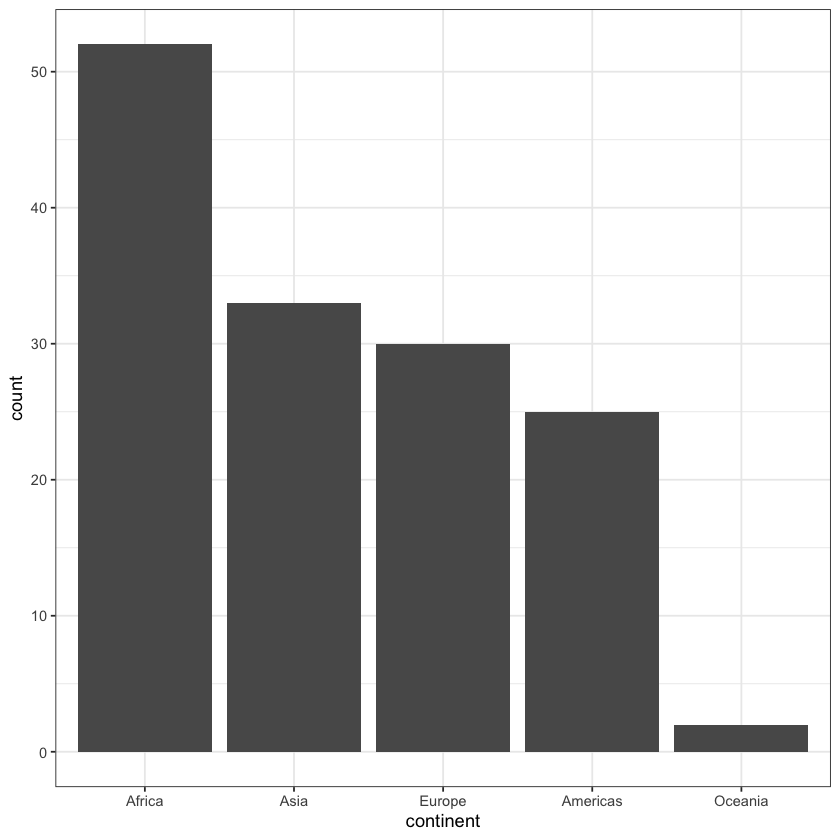

In [45]:
gapminder %>% 
  filter(year == 2007) %>% 
  mutate(continent = fct_infreq(continent)) %>% 
  ggplot(aes(continent)) +
  geom_bar() +
  theme_bw()

**QUESTION 2.0**

Fill in the seven grammar components for this plot. Choose the best option, and place your choice in a variable named `answer2.0`

1:

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `continent` |
| __geometric object__  | `bars` |
| scale                 | `logarithmic` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |

2:

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `continent` |
| __geometric object__  | `bars` |
| scale                 | `linear` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |

3:

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `year` |
| __geometric object__  | `bars` |
| scale                 | `linear` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |


In [46]:
# answer2.0 <- youranswerhere

### BEGIN SOLUTION
answer2.0 <- 2
### END SOLUTION

In [47]:
test_that("Question 2.0", {
    expect_equal(digest(as.numeric(answer2.0)), "db8e490a925a60e62212cefc7674ca02")
})
cat("success!")

success!

Look at this plot instead.

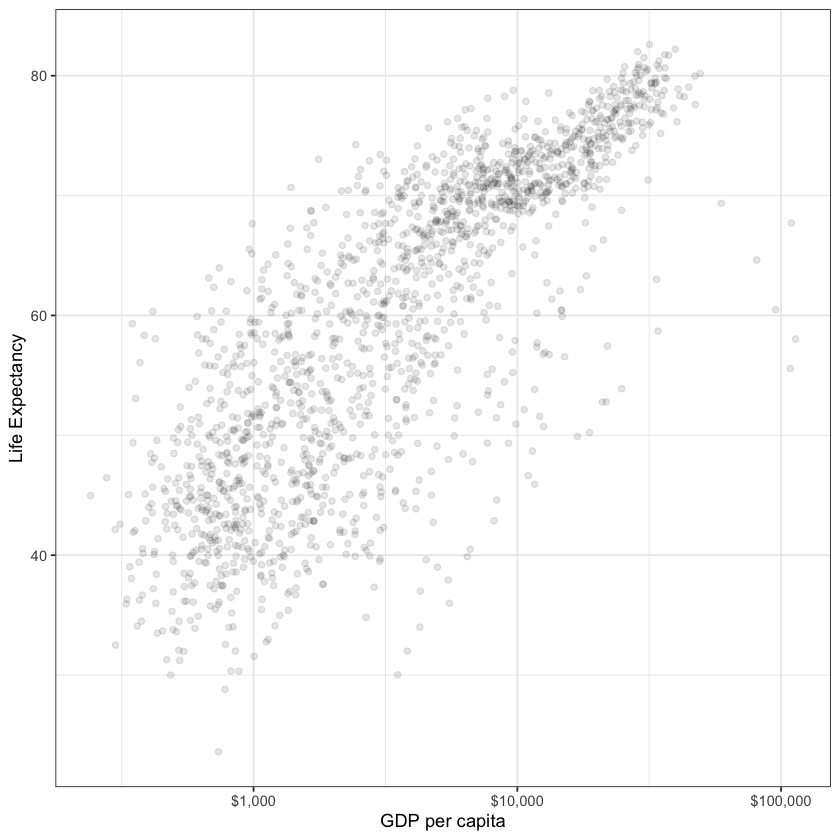

In [48]:
ggplot(gapminder, aes(gdpPercap, lifeExp)) +
  geom_point(alpha = 0.1) +
  scale_x_log10("GDP per capita", labels = scales::dollar_format()) +
  theme_bw() +
  ylab("Life Expectancy")

**QUESTION 2.1**

What is the aesthetic mapping in this plot? Place your answer in a variable named `answer2.1`

1: alpha = 0.1   
2: x: gdpPercap, y: lifeExp   
3: none   
4: "Life Expectancy"

In [49]:
# answer2.1 <- youranswer

### BEGIN SOLUTION
answer2.1 <- 2
### END SOLUTION

In [50]:
test_that("Question 2.1", {
    expect_equal(digest(as.numeric(answer2.1)), "db8e490a925a60e62212cefc7674ca02")
})
cat("success!")

success!

## `ggplot2` Syntax 

The following is a tsibble (a special type of tibble containing time series data, which we'll see more of later), stored in the variable `mauna`, of CO$_2$ concentrations collected monthly at the Mauna Loa station.

Execute this code to store the data in `mauna`:

In [51]:
mauna <- tsibble::as_tsibble(co2) %>% 
   rename(month = index, conc = value)
print(mauna, n = 5)

# A tsibble: 468 x 2 [1M]
     month  conc
     <mth> <dbl>
1 1959 Jan  315.
2 1959 Feb  316.
3 1959 Mar  316.
4 1959 Apr  318.
5 1959 May  318.
# … with 463 more rows


**QUESTION 2.2**

Produce a line chart showing the concentration over time. Specifically, the plot should have the following grammar components:

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `mauna` |
| __aesthetic mapping__ | x: month, y: conc |
| __geometric object__  | lines |
| scale                 | linear |
| statistical transform | none |
| coordinate system     | rectangular |
| facetting             | none |

Fill in the blanks to obtain the plot, storing your plot in a variable named `answer2.2`

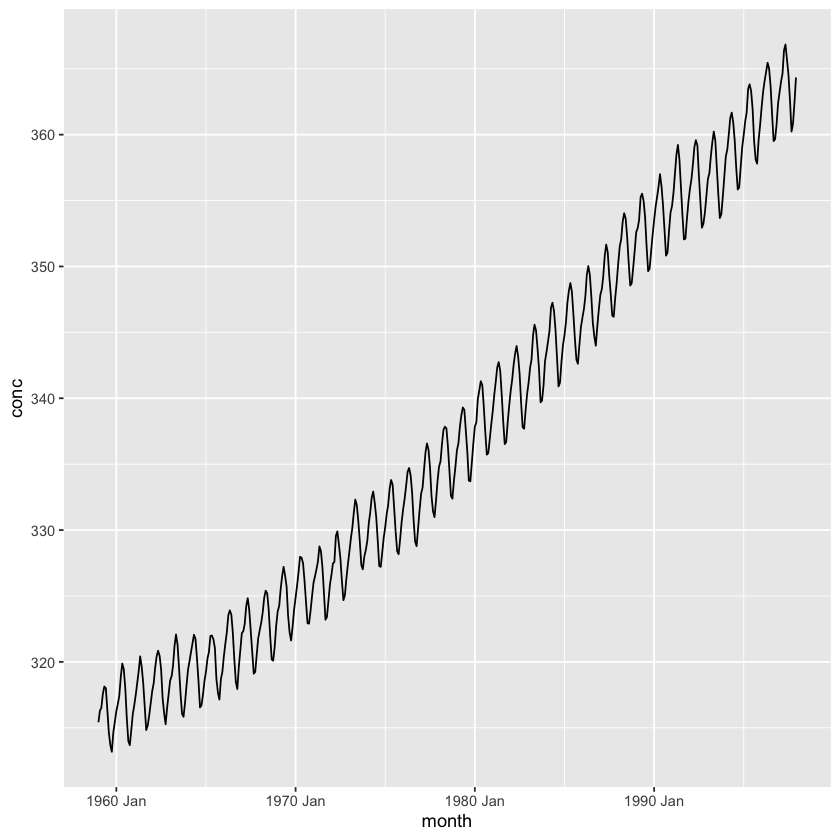

In [52]:
# answer2.2 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN, FILL_THIS_IN)) +
# FILL_THIS_IN()

### BEGIN SOLUTION
answer2.2 <- ggplot(mauna, aes(x = month, y = conc)) + 
    geom_line()
### END SOLUTION
print(answer2.2)

In [53]:
test_that("Question 2.2", {
    expect_equal(as.character(rlang::get_expr(answer2.2$mapping$x)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.2$mapping$y)), "conc")
    expect_true("GeomLine" %in% class(answer2.2$layers[[1]]$geom))
})
cat("success!")

success!

**QUESTION 2.3**

It turns out that you're allowed to specify the aesthetic mappings in a `geom` layer instead of, or in addition to, in the `ggplot()` function, with the following rules:

- Aesthetics appearing in a `geom` layer apply only to that layer.
- If there are conflicting aesthetics in both the `ggplot()` function and the `geom` layer, the `geom` layer takes precedence.

The following code mistakenly puts the month variable on the y-axis. Fill in the `FILL_THIS_IN` so that `conc` is on the y-axis (and month remains on the x-axis). Note what happens to the y-axis label, though! Store your answer in a variable named `answer2.3`

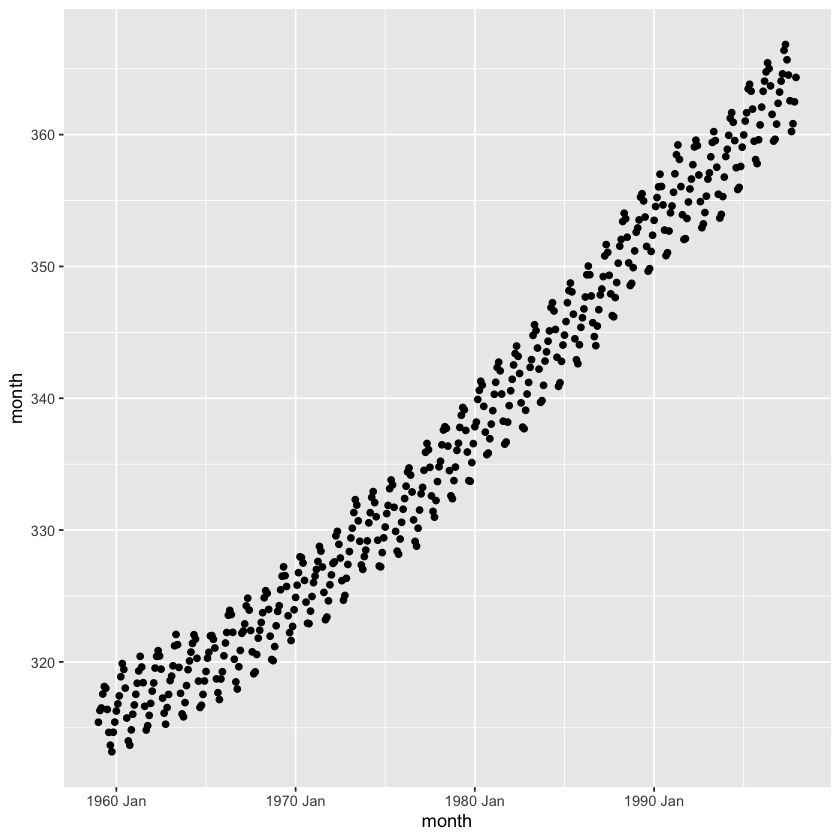

In [54]:
# answer2.3 <-
# ggplot(mauna, aes(x = month, y = month)) +
# geom_point(FILL_THIS_IN)

### BEGIN SOLUTION 
answer2.3 <- ggplot(mauna, aes(x = month, y = month)) +
  geom_point(aes(y = conc))
### END SOLUTION
plot(answer2.3)

In [55]:
test_that("Question 2.3", {
    expect_equal(as.character(rlang::get_expr(answer2.3$mapping$x)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.3$mapping$y)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.3$layers[[1]]$mapping$y)), "conc")
})
cat("success!")

success!

**QUESTION 2.4**

You can store the output of the plot in a variable, too. The plot that you created in 2.2 is stored in the variable `answer2.2`. Add a layer to `answer2.2` that adds green points to the plot. 

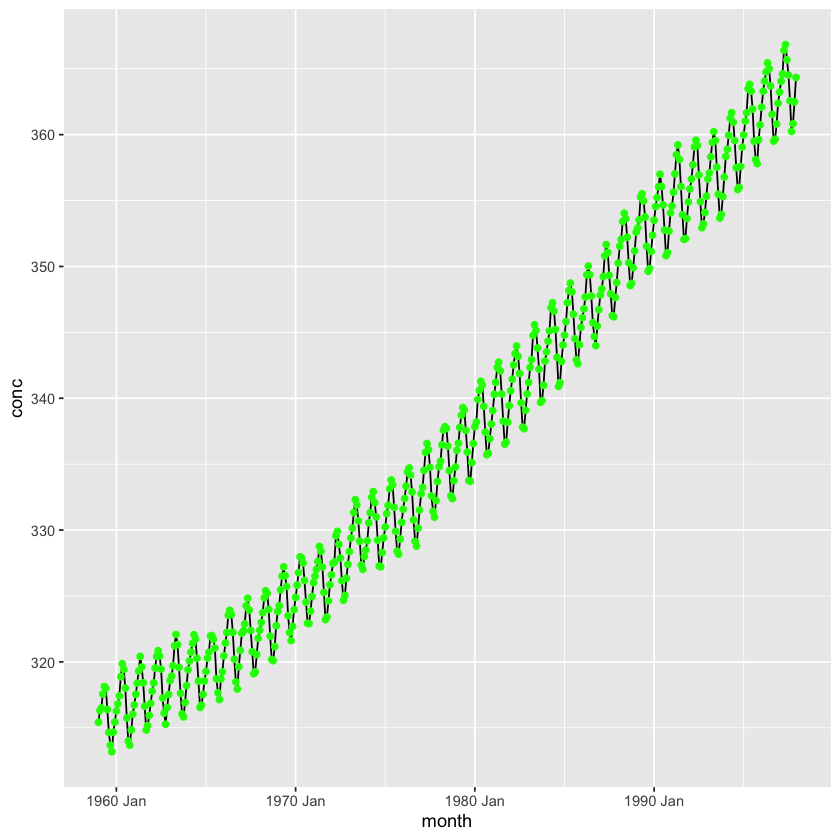

In [56]:
#answer2.4 <- answer2.2 +
#  FILL_THIS_IN(colour = FILL_THIS_IN)

### BEGIN SOLUTION
answer2.4 <- answer2.2 +
  geom_point(colour = "green")
### END SOLUTION
print(answer2.4)

In [57]:
# test for the plot aesthetics
test_that("Question 2.4", {
    expect_false("colour" %in% names(rlang::get_expr(answer2.4$layers[[2]]$mapping)))
    expect_false("color" %in% names(rlang::get_expr(answer2.4$layers[[2]]$mapping)))
    expect_true(is.character(answer2.4$layers[[2]]$geom_params$colour))
})
cat("success!")

success!

**QUESTION 2.5**

Can you fix what is wrong with the following code?

```
answer2.5 <- ggplot(gapminder) +
    geom_point(x = gdpPercap, y = lifeExp, alpha = 0.1)
```

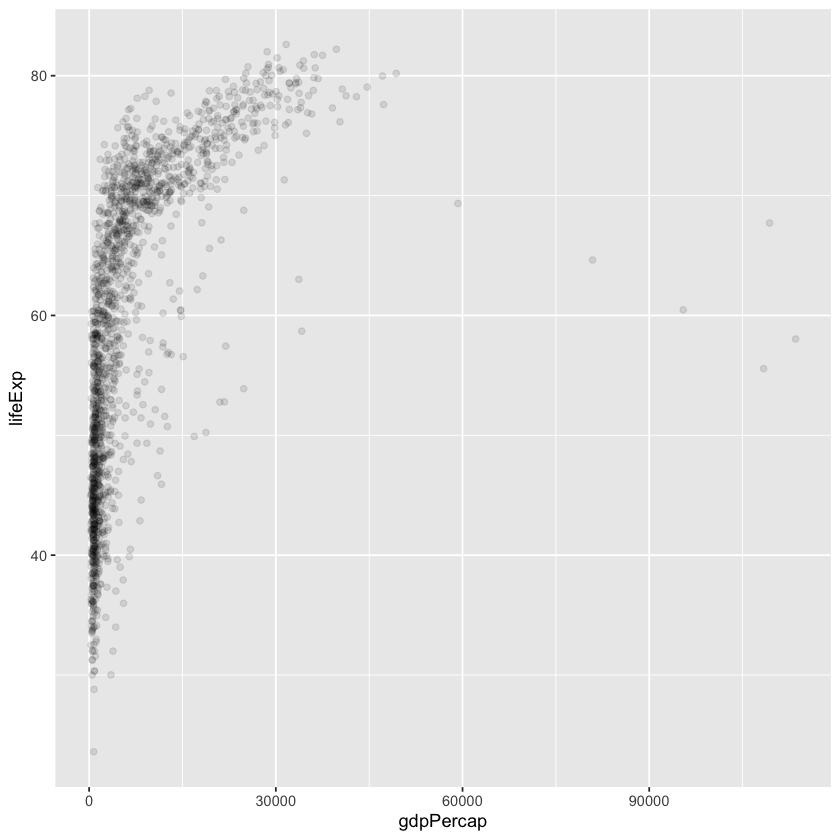

In [58]:
# answer2.5 <- ggplot(gapminder) +
#  geom_point(x = gdpPercap, y = lifeExp, alpha = 0.1)
### BEGIN SOLUTION
answer2.5 <- ggplot(gapminder) +
  geom_point(aes(x = gdpPercap, y = lifeExp), alpha = 0.1)
### END SOLUTION
print(answer2.5)

In [59]:
test_that("Question 2.5", {
    expect_true(
        as.character(rlang::get_expr(answer2.5$mapping$x)) == "gdpPercap" ||
        as.character(rlang::get_expr(answer2.5$layers[[1]]$mapping$x)) == "gdpPercap"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.5$mapping$y)) == "lifeExp" ||
        as.character(rlang::get_expr(answer2.5$layers[[1]]$mapping$y)) == "lifeExp"
    )
})
cat("success!")

success!

Remember the `penguins` dataset that we worked with in Part A of the worksheet? Let's try visualizing some of that data.

**QUESTION 2.6**

There are many questions that you may want to ask about the `penguins` dataset. Often, exploring relationships between variables is one of the first steps when exploring your data. Scatterplots are a great way to visualize this. 

Let's explore the relationship between flipper length and body mass (if any!). I have provided the "scaffold" of the ggplot2 recipe, now it's your turn to fill it in. Use the following parameters:

- Flipper length should be on the x axis, and body mass should be on the y axis.
- Color by species.
- Set the size of the points to 3, and the alpha (transparency) to 0.8.

Store the result in a variable named `answer2.6`

Warning message:
“Removed 2 rows containing missing values (geom_point).”


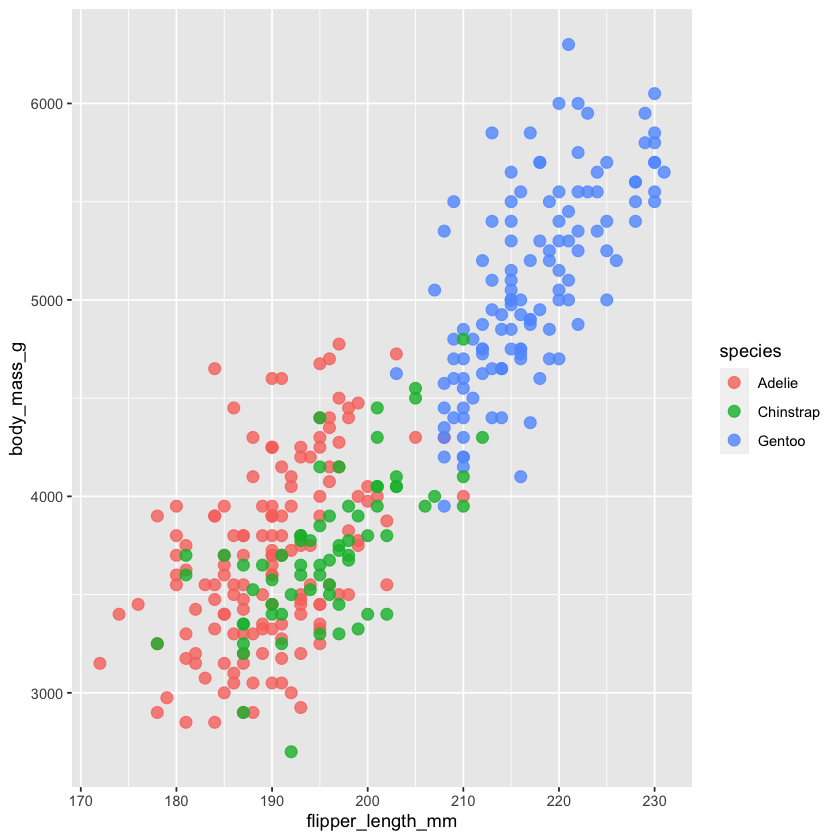

In [60]:
# answer2.6 <- 
#  ggplot(data = FILL_THIS_IN, aes(x = FILL_THIS_IN, y = FILL_THIS_IN)) +
#  geom_point(aes(color = FILL_THIS_IN),
#             size = FILL_THIS_IN,
#             alpha = FILL_THIS_IN) 

### BEGIN SOLUTION
answer2.6 <- ggplot(penguins, aes(flipper_length_mm, body_mass_g)) +
  geom_point(aes(color = species),
             size = 3,
             alpha = 0.8) 
### END SOLUTION
print(answer2.6)

In [61]:
test_that("Question 2.6", {
    expect_true(
        as.character(rlang::get_expr(answer2.6$mapping$x)) == "flipper_length_mm" ||
        as.character(rlang::get_expr(answer2.6$layers[[1]]$mapping$x)) == "flipper_length_mm"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.6$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.6$layers[[1]]$mapping$y)) == "body_mass_g"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.6$mapping$colour)) == "species" ||
        as.character(rlang::get_expr(answer2.6$layers[[1]]$mapping$colour)) == "species"
    )
    expect_equal(answer2.6$layers[[1]]$geom_params$alpha, 0.8)
    expect_equal(answer2.6$layers[[1]]$geom_params$size, 3)
})
cat("success!")

success!

**QUESTION 2.7**

Try the same as in 2.6 (flipper length vs. body mass), but this time coloring by island! See if you can write the code without looking at the last question. Store your answer in a variable named `answer2.7`

Warning message:
“Removed 2 rows containing missing values (geom_point).”


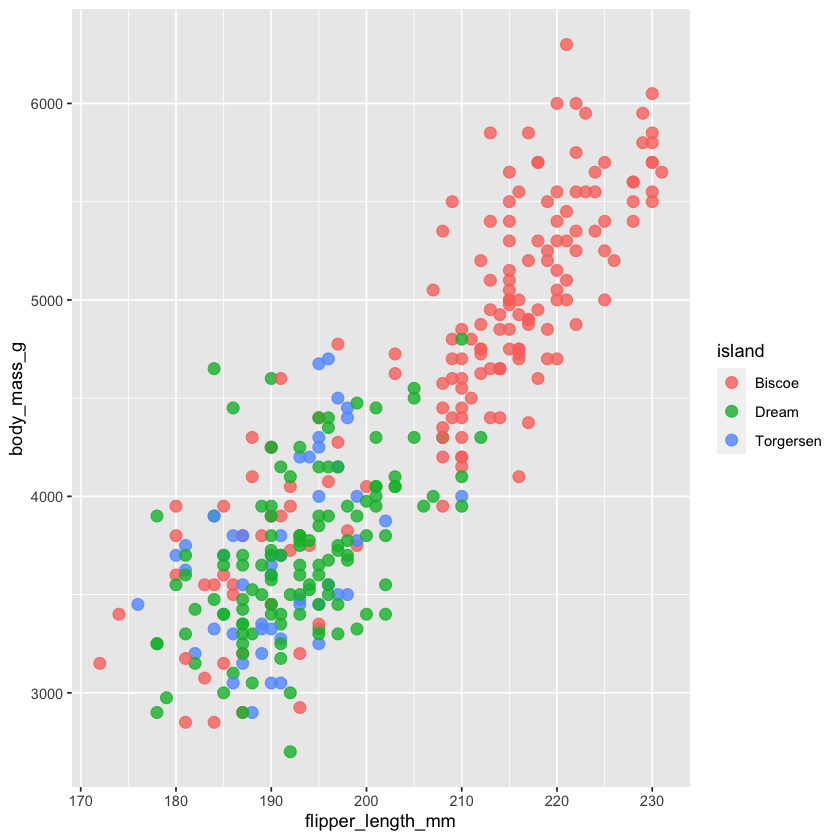

In [63]:
# answer2.7 <- youranswer

### BEGIN SOLUTION
answer2.7 <- ggplot(penguins, aes(flipper_length_mm, body_mass_g)) +
  geom_point(aes(color = island),
             size = 3,
             alpha = 0.8) 
### END SOLUTION
plot(answer2.7)

In [64]:
test_that("Question 2.7", {
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$x)) == "flipper_length_mm" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$x)) == "flipper_length_mm"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$y)) == "body_mass_g"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$colour)) == "island" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$colour)) == "island"
    )
    expect_equal(answer2.7$layers[[1]]$geom_params$alpha, 0.8)
    expect_equal(answer2.7$layers[[1]]$geom_params$size, 3)
})
cat("success!")

success!

**QUESTION 2.8**

Suppose you want to visualize the number of penguins per island. It seems that a bar chart could be useful for this purpose. Give it a try! Hint: bar charts only need specifying one axis (use the x axis). Store your answer in a variable named `answer2.8`

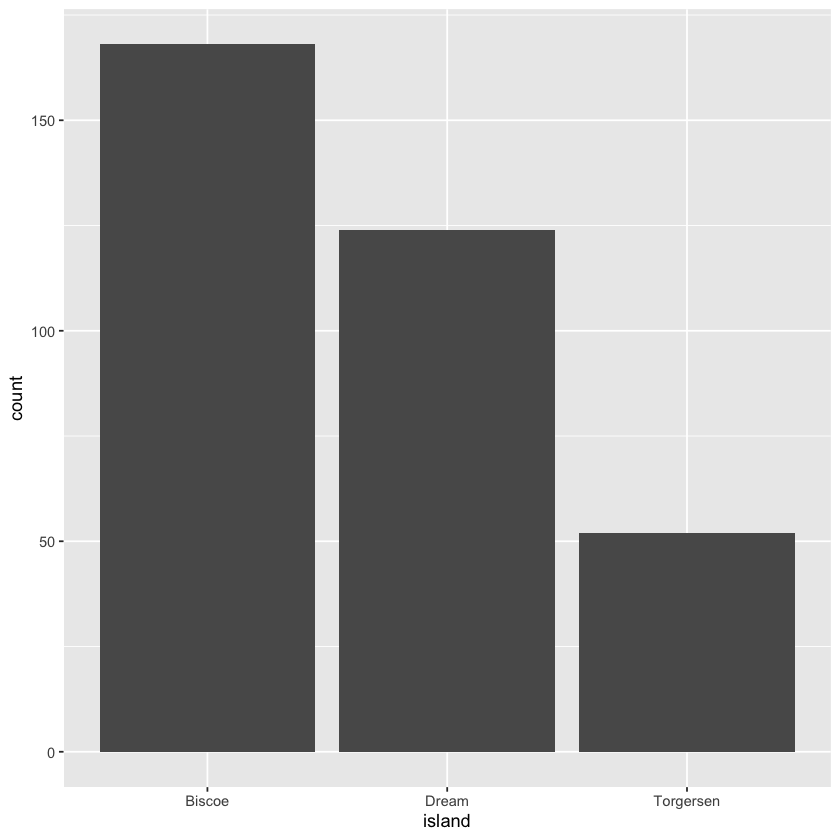

In [65]:
# answer2.8 <- ggplot(penguins, aes(FILL_THIS_IN)) + FILL_THIS_IN()

### BEGIN SOLUTION
answer2.8 <- ggplot(penguins, aes(x = island)) + geom_bar()
### END SOLUTION
print(answer2.8)

In [66]:
test_that("Question 2.8", {
    expect_true(
        as.character(rlang::get_expr(answer2.8$mapping$x)) == "island" ||
        as.character(rlang::get_expr(answer2.8$layers[[1]]$mapping$x)) == "island"
    )
    expect_true(
        "GeomBar" %in% class(answer2.8$layers[[1]]$geom) ||
        "GeomCol" %in% class(answer2.8$layers[[1]]$geom)
    )
})
cat("success!")

success!

Great job! Bar plots can be plotted in either way. Here is another handy way to flip the coordinates, instead of plotting the graph again.

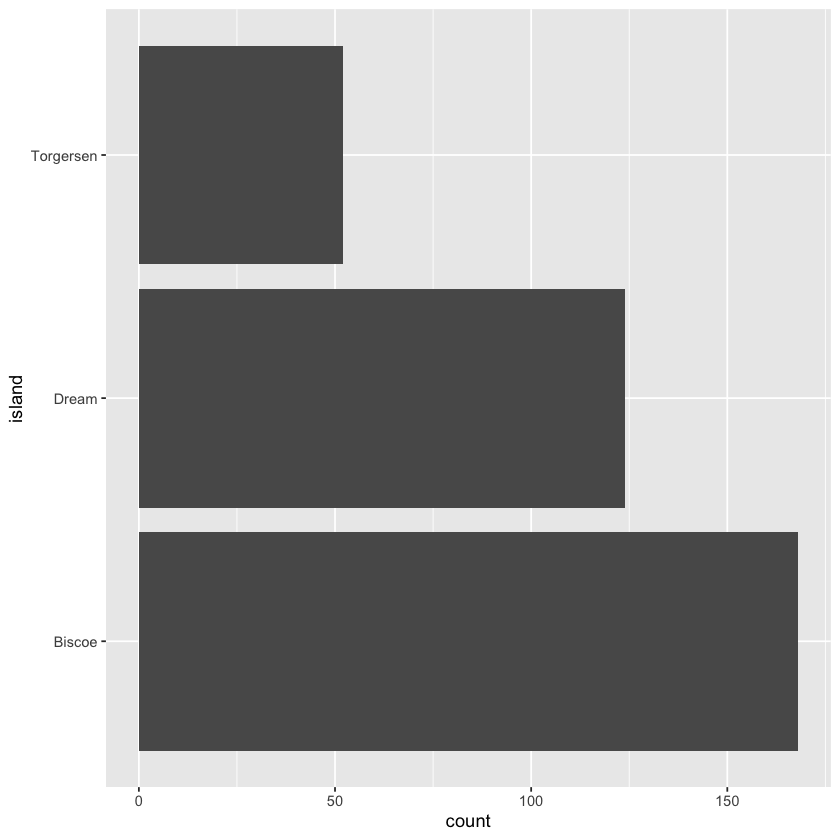

In [68]:
answer2.8 + coord_flip()

You get the same result!

**QUESTION 2.9**

Maybe you want to explore the distribution of body mass. Exploring the distribution is one of the most important things when looking at data; different models have different assumptions, and the distribution of data is usually one of those assumptions. No need to worry about models for now, but it's interesting to know ways in which you can explore distribution visually! Histograms are useful for this purpose.

Make a histogram of penguin body mass, and store the result in a variable named `answer2.9`

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


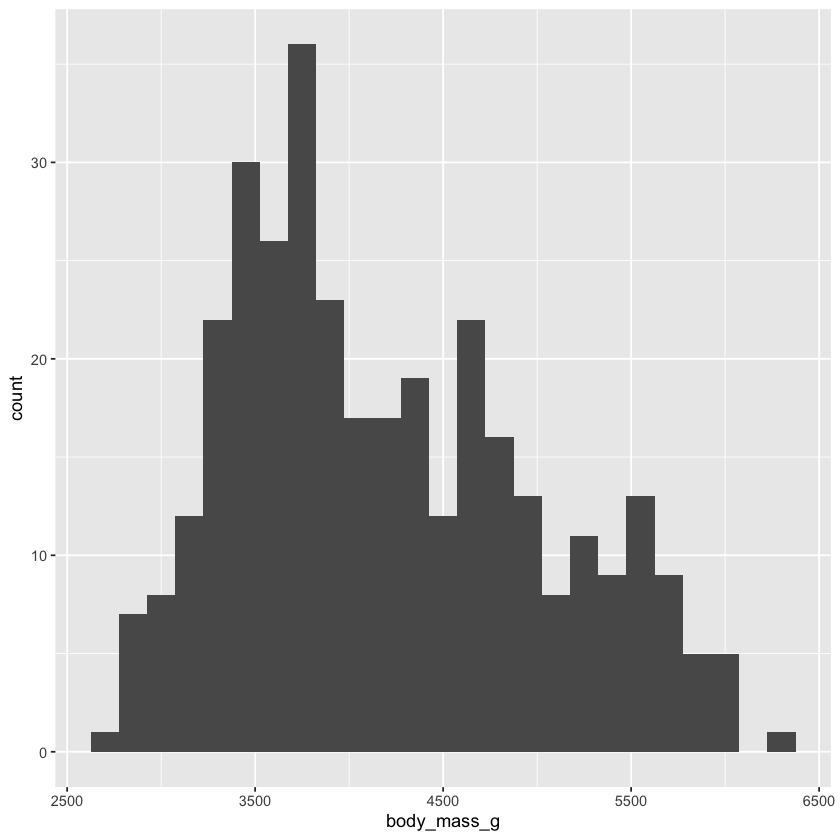

In [69]:
# answer2.9 <-
# ggplot(FILL_THIS_IN, aes(x = FILL_THIS_IN)) +
#  geom_histogram()

### BEGIN SOLUTION
answer2.9 <- ggplot(penguins, aes(body_mass_g)) +
  geom_histogram(bins = 25)
### END SOLUTION
print(answer2.9)

In [70]:
test_that("Question 2.9", {
    expect_true(
        as.character(rlang::get_expr(answer2.9$mapping$x)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.9$layers[[1]]$mapping$x)) == "body_mass_g"
    )
    expect_true("GeomBar" %in% class(answer2.9$layers[[1]]$geom))
})
cat("success!")

success!

**QUESTION 2.10**

There's another option besides plotting histograms, and that's to plot the _kernel density function_. This geom can be achieved with `geom_density()`.

Plot the density of body mass for each species. Distinguish species by colour (if you decide to use the `fill` aesthetic, be sure to add some alpha transparency). Store your answer in a variable named `answer2.10`.

Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


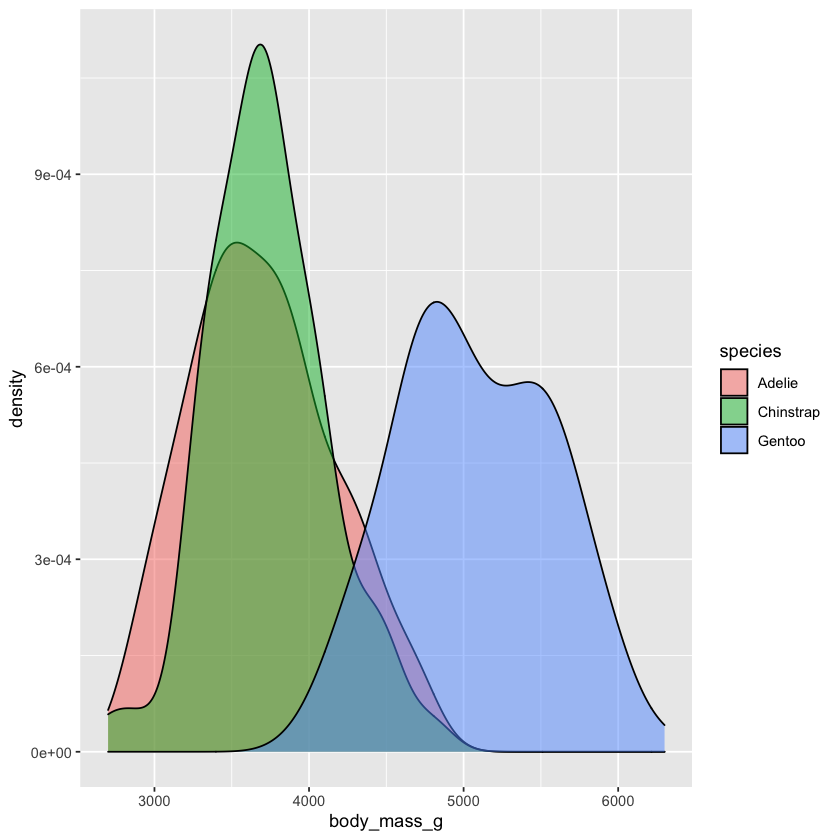

In [71]:
# answer2.10 <- ggplot(COMPLETE_THE_CODE) + geom_density()

### BEGIN SOLUTION
answer2.10 <- ggplot(penguins, aes(x = body_mass_g, color = species)) +
  geom_density()
answer2.10 <- ggplot(penguins, aes(x = body_mass_g)) +
  geom_density(aes(fill = species), alpha = 0.5)
### END SOLUTION
print(answer2.10)

In [72]:
test_that("Question 2.10", {
    expect_true(
        as.character(rlang::get_expr(answer2.10$mapping$x)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$x)) == "body_mass_g"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.10$mapping$colour)) == "species" ||
        as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$colour)) == "species" ||
        (
            (
                as.character(rlang::get_expr(answer2.10$mapping$fill)) == "species" ||
                as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$fill)) == "species"
            ) &&
            expect_lt(answer2.10$layers[[1]]$geom_params$alpha, 1)
        )
    )
    expect_true("GeomDensity" %in% class(answer2.10$layers[[1]]$geom))
})
cat("success!")

success!

**QUESTION 2.11**

Let's look at two more types of plot to once again explore the relationship between body mass and penguin species. Stripplots are univariate scatterplots, and they are a useful way of visualizing how, in this case, body mass is spread in each species. Specify "species" as x, and "body_mass_g" as y.

Store the result in a variable named `answer2.11`

Warning message:
“Removed 2 rows containing missing values (geom_point).”


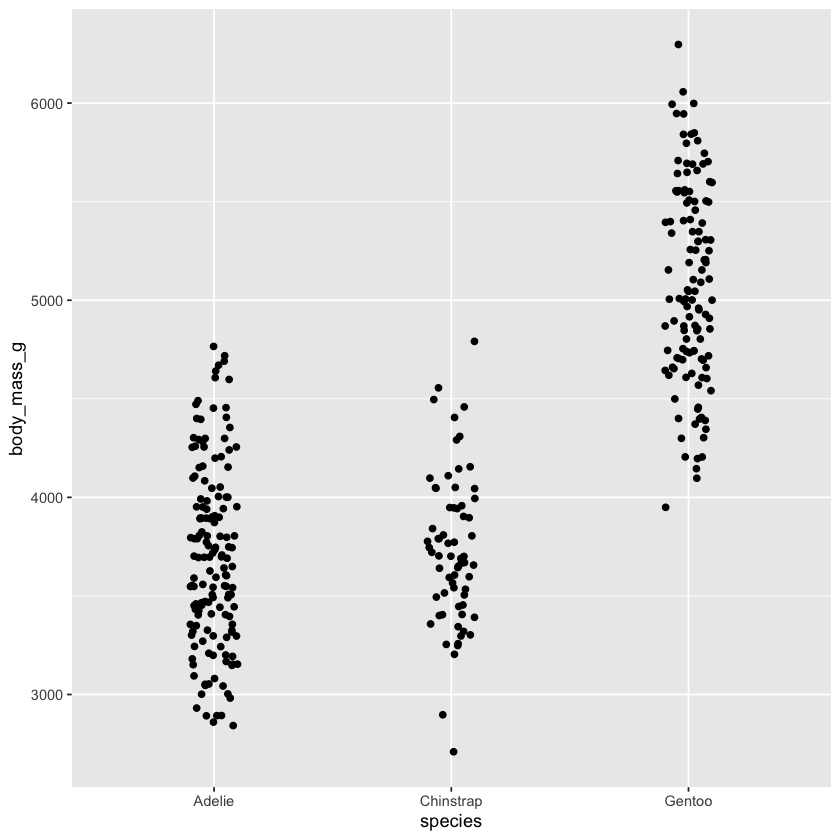

In [73]:
# answer2.11 <-
#  ggplot(FILL_THIS_IN, aes(COMPLETE_THE_CODE)) + geom_jitter()

### BEGIN SOLUTION
answer2.11 <- ggplot(penguins, aes(x = species, y = body_mass_g)) + 
    geom_jitter(width = 0.1)
### END SOLUTION
print(answer2.11)

In [74]:
test_that("Question 2.11", {
    expect_true(
        as.character(rlang::get_expr(answer2.11$mapping$x)) == "species" ||
        as.character(rlang::get_expr(answer2.11$layers[[1]]$mapping$x)) == "species"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.11$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.11$layers[[1]]$mapping$y)) == "body_mass_g"
    )    
    expect_true("GeomPoint" %in% class(answer2.11$layers[[1]]$geom))
    expect_true("PositionJitter" %in% class(answer2.11$layers[[1]]$position))
})
cat("success!")

success!

**QUESTION 2.12**

A similar option is a boxplot. Reproduce the plot in Question 2.11, but as boxplots instead of stripplots. Hint: use `geom_boxplot()`.

Store your answer in a variable named `answer2.12`

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”


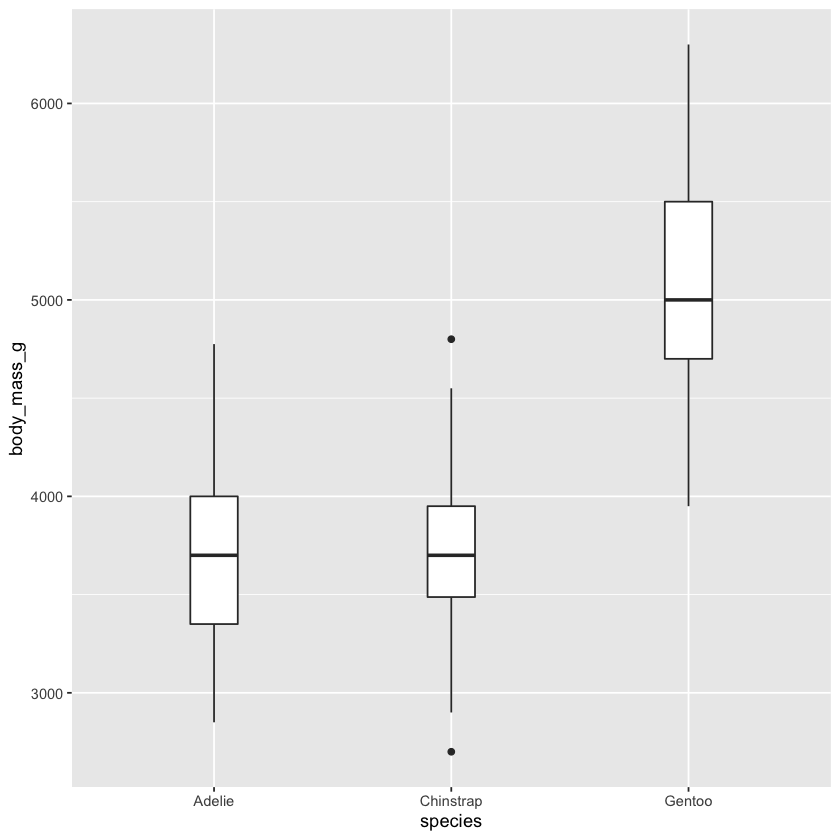

In [75]:
# answer2.12 <- youranswer

### BEGIN SOLUTION
answer2.12 <- ggplot(penguins, aes(species, body_mass_g)) + 
    geom_boxplot(width = 0.2)
### END SOLUTION
print(answer2.12)

In [76]:
test_that("Question 2.12", {
    expect_true(
        as.character(rlang::get_expr(answer2.12$mapping$x)) == "species" ||
        as.character(rlang::get_expr(answer2.12$layers[[1]]$mapping$x)) == "species"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.12$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.12$layers[[1]]$mapping$y)) == "body_mass_g"
    )    
    expect_true("GeomBoxplot" %in% class(answer2.12$layers[[1]]$geom))
})
cat("success!")

success!

**Congratulations!** You've finished Part B of Worksheet 2, and with that, Worksheet 2 overall. Which also means that you've completed 3 weeks of STAT545A, and you're well on your way to being an R pro. Not quite done with practicing data viz with ggplot? We'll be diving deeper into plotting next week, but here are a few resources if you want to explore in the meantime:

+ [Jenny Bryan's ggplot2 tutorial](https://github.com/jennybc/ggplot2-tutorial). Has lots of examples, but less dialogue.
+ [R4DS Data Viz chapter](https://r4ds.had.co.nz/data-visualisation.html). With a comprehensive walk-through style.
+ [Chapter 2 of the ggplot book](http://webcat2.library.ubc.ca/vwebv/holdingsInfo?bibId=8489511). Even more detailed!

